In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
font = {'family': 'sans-serif', 'serif': 'Helvetica',
        'size': 25}
plt.rc('font', **font)
legnd = {'fontsize': 20, 'handlelength': 1.5}
plt.rc('legend', **legnd)
mathtext = {'mathtext.default': 'regular' } 
plt.rcParams.update(mathtext)

In [2]:
df = pd.read_csv("qualitative_results.tsv", sep="\t")
df.head()

,alpha_EZ,alpha_ZE,eqE,eqZ,eqEZ
0,-0.041615,-0.054193,stable,stable,unstable
1,-0.041615,-0.055277,stable,stable,unstable
2,-0.041615,-0.056360,stable,stable,unstable
3,-0.041615,-0.057444,stable,stable,unstable
4,-0.041615,-0.058528,stable,stable,unstable


In [3]:
df[['eqE', 'eqZ', 'eqEZ']].drop_duplicates()

,eqE,eqZ,eqEZ
0,stable,stable,unstable
25,stable,stable,unbounded
26,unstable,stable,unstable
126,unstable,stable,unbounded
2599,stable,unstable,unstable
2600,stable,unstable,unbounded
2625,unstable,unstable,stable
8398,unstable,unstable,unbounded


In [4]:
def which_regime(trip):
    if trip['eqE'] == "stable":
        if trip['eqZ'] == "stable":
            return "bistable competitive exclusion"
        else:
            return "E dominates"
    elif trip['eqZ'] == "stable":
        return "Z dominates"
    elif trip['eqEZ'] == "stable":
        return "co-existence"
    else:
        return "unbounded growth"

In [5]:
df['regime'] = df.apply(which_regime, axis=1)
df['eqEZ_unbounded'] = df.apply(lambda x: True if x['eqEZ']=="unbounded" else False, axis=1)
df.head()

,alpha_EZ,alpha_ZE,eqE,eqZ,eqEZ,regime,eqEZ_unbounded
0,-0.041615,-0.054193,stable,stable,unstable,bistable competitive exclusion,False
1,-0.041615,-0.055277,stable,stable,unstable,bistable competitive exclusion,False
2,-0.041615,-0.056360,stable,stable,unstable,bistable competitive exclusion,False
3,-0.041615,-0.057444,stable,stable,unstable,bistable competitive exclusion,False
4,-0.041615,-0.058528,stable,stable,unstable,bistable competitive exclusion,False


In [6]:
maxEZ = df['alpha_EZ'].max()
minEZ = df['alpha_EZ'].min()

maxZE = df['alpha_ZE'].max()
minZE = df['alpha_ZE'].min()

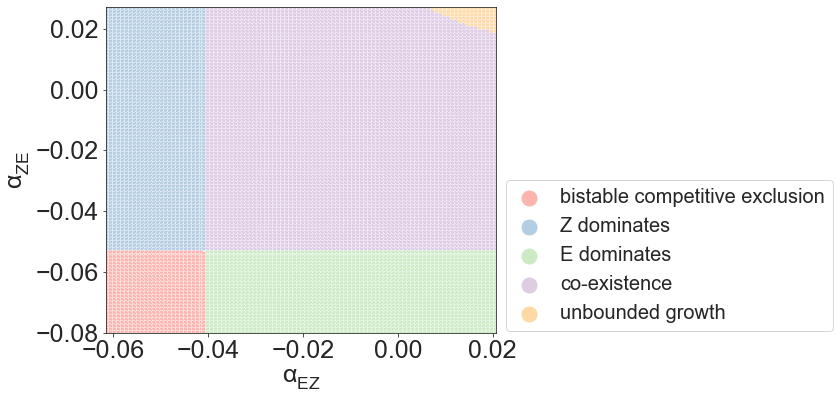

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

sns.scatterplot(data=df, x="alpha_EZ", y="alpha_ZE", hue="regime", palette="Pastel1")

ax.set_xlim((minEZ, maxEZ))
ax.set_ylim((minZE, maxZE))

ax.set_xlabel(r"$\alpha_{EZ}$")
ax.set_ylabel(r"$\alpha_{ZE}$")

ax.legend(bbox_to_anchor=(1, 0.5), loc='upper left', markerscale=2.5)

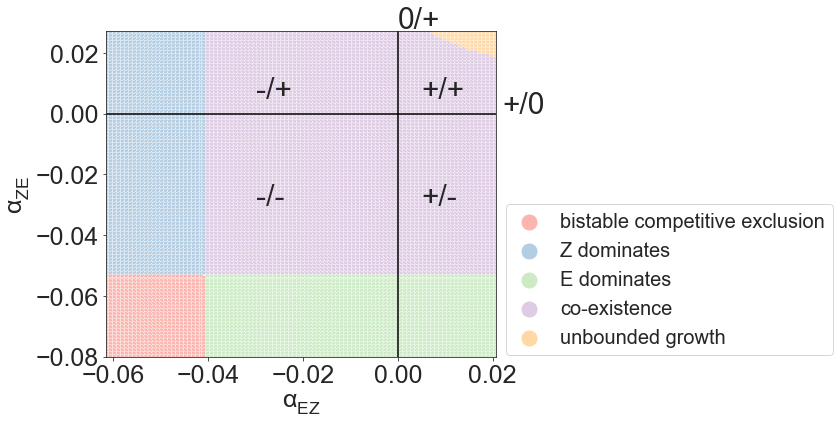

In [8]:
ax.axvline(0.0, color="black")
ax.axhline(0.0, color="black")

ax.text(x=0.005, y=0.005, s="+/+", fontsize='large')
ax.text(x=-0.03, y=0.005, s="-/+", fontsize='large')
ax.text(x=-0.03, y=-0.03, s="-/-", fontsize='large')
ax.text(x=0.005, y=-0.03, s="+/-", fontsize='large')

ax.text(x=0.0, y=0.028, s="0/+", fontsize='large')
ax.text(x=0.022, y=0.0, s="+/0", fontsize='large')

fig

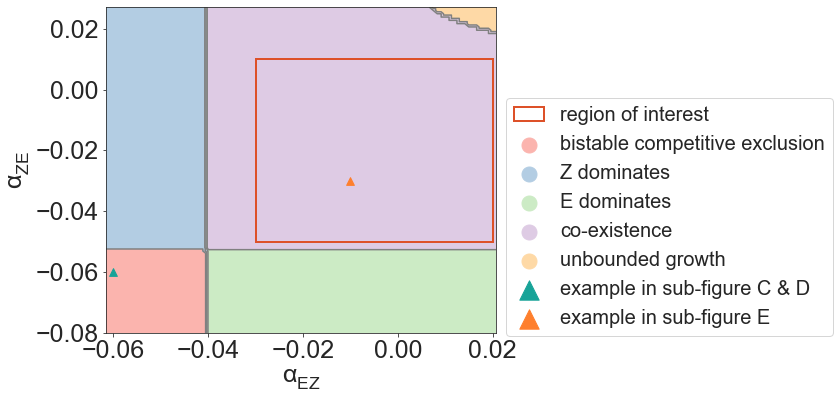

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

import matplotlib.tri as tri
x = df['alpha_EZ']
y = df['alpha_ZE']
z = pd.factorize(df['regime'])[0]

triang = tri.Triangulation(x, y)

pastel = sns.color_palette("Pastel1", 5, as_cmap=True)

sns.scatterplot(data=df, x="alpha_EZ", y="alpha_ZE", hue="regime", 
                palette="Pastel1")
tcf = ax.tricontourf(triang, z, levels=6, cmap=pastel, vmin=0, vmax=8)
# fig.colorbar(tcf)
# ax.tricontour(triang, z, levels=6, colors=sns.color_palette("Pastel1", 5), linewidths=2.0)
ax.tricontour(triang, z, levels=6, colors='grey', linewidths=1.5)

ax.set_xlim((minEZ, maxEZ))
ax.set_ylim((minZE, maxZE))

ax.set_xlabel(r"$\alpha_{EZ}$")
ax.set_ylabel(r"$\alpha_{ZE}$")

from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((-0.03, -0.05), 0.05, 0.06, 
             edgecolor = '#dd5129', lw=2, fill=False, label="region of interest"))

ax.scatter(x=-0.06, y=-0.06, marker='^', c='#17A398', s=60,
           label="example in sub-figure C & D")
ax.scatter(x=-0.01, y=-0.03, marker='^', c='#FE7F2D', s=60,
           label="example in sub-figure E")

ax.legend(bbox_to_anchor=(1, -0.04), loc='lower left', markerscale=2.5)

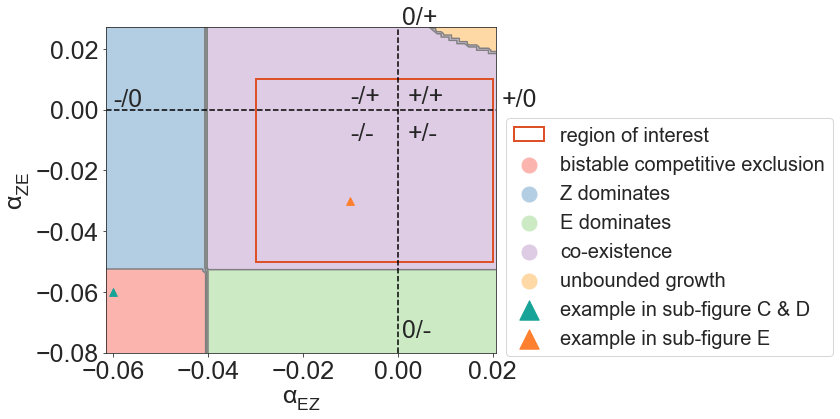

In [10]:
ax.axvline(0.0, color="black", ls='dashed')
ax.axhline(0.0, color="black", ls='dashed')

ax.text(x=0.002, y=0.002, s="+/+", fontsize=25)
ax.text(x=-0.01, y=0.002, s="-/+", fontsize=25)
ax.text(x=-0.01, y=-0.01, s="-/-", fontsize=25)
ax.text(x=0.002, y=-0.01, s="+/-", fontsize=25)

ax.text(x=0.001, y=0.028, s="0/+", fontsize=25)
ax.text(x=0.022, y=0.001, s="+/0", fontsize=25)

ax.text(x=0.001, y=-0.075, s="0/-", fontsize=25)
ax.text(x=-0.06, y=0.001, s="-/0", fontsize=25)

fig.savefig("qualitative_figreport.svg", bbox_inches='tight')
fig

Text(0, 0.5, '$\\alpha_{ZE}$')

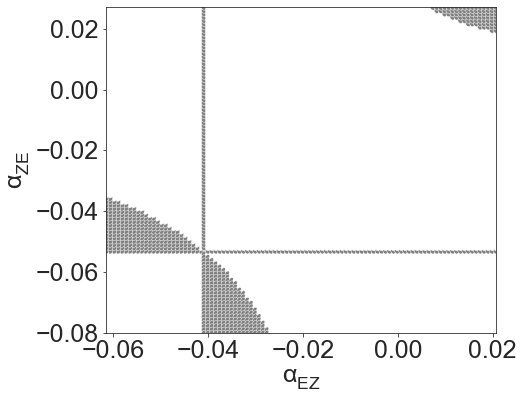

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

sns.scatterplot(data=df, x="alpha_EZ", y="alpha_ZE", hue="eqEZ_unbounded", 
                palette=["white", "grey"], legend=False)

ax.set_xlim((minEZ, maxEZ))
ax.set_ylim((minZE, maxZE))

ax.set_xlabel(r"$\alpha_{EZ}$")
ax.set_ylabel(r"$\alpha_{ZE}$")

# ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [12]:
from polin.qualitative import Quali

param_file = "qualitative_params.json"
Q = Quali(param_file)

alphas=(-0.045, -0.06)

eql = Q.equilibria(alphas)
print(eql)

print([Q.stability(x, alphas) for x in eql])

[array([0.3088, 0.    ]), array([0.    , 0.3629]), array([0.12950287, 0.19096125])]
['stable', 'stable', 'unstable']


In [13]:
alphas=(-0.06, 1.0)

eql = Q.equilibria(alphas)
print(eql)

print([Q.stability(x, alphas) for x in eql])

[array([0.3088, 0.    ]), array([0.    , 0.3629]), array([-0.00506975,  0.25071634])]
['unstable', 'stable', 'unstable']
